# Investigating IMDB Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this analysis, I'm going to explore and analyze the nearly 11,000 row TMDB movie database (very similar to IMDB but with fewer rows). Outside of data exploration and cleansing, I'm going to explore:
>
> Which movie genres are most popular from year to year? 
>
> Do movies tend to "follow the leader" when it comes to genre, and do multiple movies in the same genre follow big (high revenue) hits?

In [1]:
# Set up import statements for all of the packages that I'll use.
import numpy as np
import random
import pandas as pd
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section, I'm going ot load the data, check for cleanliness, and then trim and clean your dataset for analysis. 

### General Properties

In [46]:
# Loading the data and performing basic operations to inspect the data
#   types and look for instances of missing or possibly errant data.
# Downloaded file from https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv
#df = pd.read_csv('~/Downloads/tmdb-movies.csv')
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv'
df = pd.read_csv(url)   
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### Data Cleaning

In [47]:
# 'Homepage' column is especially sparse and does not seem to add worthwhile information.
# Also seems to be exceedingly rare in earlier movies (pre-2004). Dropping column to simplify
# Inspecting home page frequency around 2004
# df[7000:7200]
# Dropping 'homepage'
df.drop(['homepage'], axis=1, inplace = True)
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [48]:
# Explore duplicates
print(sum(df.duplicated()))
df[df.duplicated()]

1


,id,imdb_id,popularity,budget,revenue,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,Survival is no game,martial arts|dystopia|based on video game|mart...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [49]:
# Appears that there's one duplicate row in dataset
# Investigate more thoroughly
df.query('id == 42194')

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,Survival is no game,martial arts|dystopia|based on video game|mart...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,Survival is no game,martial arts|dystopia|based on video game|mart...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [50]:
df.drop_duplicates(inplace = True)

In [51]:
# Investigating null values in imdb_id field. See no duplicates. Will drop column, as already 'id' field.
df[(df.imdb_id.isna())]

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
548,355131,NaN,0.108072,0,0,Sense8: Creating the World,Tuppence Middleton|Bae Doona |Brian J. Smith|A...,NaN,NaN,sexuality|superhuman|superpower|making of|soci...,NaN,25,Documentary|Science Fiction,Netflix,8/10/15,12,7.5,2015,0.000000,0.0
997,287663,NaN,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,Steward Lee|Steven G. Lee,NaN,NaN,"A Long Time Ago In A Galaxy Far, Far Awayâ€¦ A...",44,NaN,NaN,10/3/14,13,6.8,2014,0.000000,0.0
1528,15257,NaN,0.607851,0,0,Hulk vs. Wolverine,Fred Tatasciore|Bryce Johnson|Steve Blum|Nolan...,Frank Paur,NaN,marvel comic|superhero|wolverine|hulk|norse my...,Department H sends in Wolverine to track down ...,38,Animation|Action|Science Fiction,Marvel Studios,1/27/09,38,6.9,2009,0.000000,0.0
1750,101907,NaN,0.256975,0,0,Hulk vs. Thor,Graham McTavish|Fred Tatasciore|Matthew Wolf|J...,Sam Liu,A Battle Between God and Monster,marvel comic|superhero|hulk|norse mythology|su...,"For ages, Odin has protected his kingdom of As...",41,Action|Animation|Fantasy|Science Fiction,Marvel Studios,1/27/09,38,6.4,2009,0.000000,0.0
2401,45644,NaN,0.067753,0,0,Opeth: In Live Concert At The Royal Albert Hall,"Mikael Ã…kerfeldt|Martin ""Axe"" Axenrot|Martin ...",NaN,"The Loyal Disharmonic Orchestra, Conducted By ...",NaN,As part of the ongoing celebration of their 20...,163,Music,NaN,9/21/10,10,8.6,2010,0.000000,0.0
4797,369145,NaN,0.167501,0,0,Doctor Who: The Snowmen,Matt Smith|Jenna Coleman|Richard E. Grant|Ian ...,NaN,NaN,NaN,"Christmas Eve, 1892, and the falling snow is t...",60,NaN,BBC Television UK,12/25/12,10,7.8,2012,0.000000,0.0
4872,269177,NaN,0.090552,0,0,Party Bercy,Florence Foresti,NaN,NaN,NaN,Florence Foresti is offered Bercy tribute to a...,120,Comedy,TF1 VidÃ©o,9/23/12,15,6.4,2012,0.000000,0.0
6071,279954,NaN,0.004323,500,0,Portal: Survive!,Monique Blanchard|Bradley Mixon,Connor McGuire|Colin McGuire,The Cake is a Lie,portal|aperture,"A short, live action fan film by Collin and Co...",7,Action|Science Fiction,NaN,10/8/13,11,7.5,2013,468.016676,0.0
7527,50127,NaN,0.570337,0,0,Fallen: The Journey,Paul Wesley|Fernanda Andrade|Tom Skerritt|Rick...,Mikael Salomon,NaN,NaN,"A year later, Aaron is still traveling around ...",80,Action|Adventure|Drama|Fantasy|Family,NaN,1/1/07,11,7.3,2007,0.000000,0.0
7809,50128,NaN,0.060795,0,0,Fallen: The Destiny,Paul Wesley|Fernanda Andrade|Tom Skerritt|Rick...,Mikael Salomon,NaN,NaN,"Aaron and Azazel defeat the Powers, and force ...",80,Adventure|Fantasy|Drama|Action|Science Fiction,NaN,1/1/07,13,7.0,2007,0.000000,0.0


In [52]:
df.query('original_title == "Doctor Who: The Snowmen"')

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
4797,369145,NaN,0.167501,0,0,Doctor Who: The Snowmen,Matt Smith|Jenna Coleman|Richard E. Grant|Ian ...,NaN,NaN,NaN,"Christmas Eve, 1892, and the falling snow is t...",60,NaN,BBC Television UK,12/25/12,10,7.8,2012,0.0,0.0


In [53]:
# Investigating null values in the cast field. Looks like there are no duplicates. Can likely drop column.
# Null values look associated with smaller budget/ smaller revenue films
df[(df.cast.isna())]

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
371,345637,tt4661600,0.422901,0,0,Sanjay's Super Team,NaN,Sanjay Patel,NaN,NaN,Sanjay's Super Team follows the daydream of a ...,7,Animation,Pixar Animation Studios,11/25/15,47,6.9,2015,0.000000e+00,0.000000e+00
441,355020,tt4908644,0.220751,0,0,Winter on Fire: Ukraine's Fight for Freedom,NaN,Evgeny Afineevsky,The Next Generation Of Revolution,NaN,A documentary on the unrest in Ukraine during ...,98,Documentary,Passion Pictures|Campbell Grobman Films|Afinee...,10/9/15,37,8.2,2015,0.000000e+00,0.000000e+00
465,321109,tt4393514,0.201696,0,0,Bitter Lake,NaN,Adam Curtis,NaN,manipulation|politics|war|control|fear,An experimental documentary that explores Saud...,135,Documentary,BBC,1/24/15,19,7.8,2015,0.000000e+00,0.000000e+00
536,333350,tt3762974,0.122543,0,0,A Faster Horse,NaN,David Gelb,NaN,mustang|car|corporation|henry ford family|car ...,David Gelb (Jiro Dreams of Sushi) tackles anot...,90,Documentary,NaN,10/8/15,12,8.0,2015,0.000000e+00,0.000000e+00
538,224972,tt3983674,0.114264,0,0,The Mask You Live In,NaN,Jennifer Siebel Newsom,"Is american masculinity harming our boys, men ...",feminism|sexism|young boy|gender roles|misogyny,"Compared to girls, research shows that boys in...",88,Documentary,NaN,1/1/15,11,8.9,2015,0.000000e+00,0.000000e+00
587,319091,tt4185572,0.062536,0,0,The Hunting Ground,NaN,Kirby Dick,NaN,NaN,From the makers of The Invisible War comes a s...,103,Documentary,NaN,2/27/15,39,7.8,2015,0.000000e+00,0.000000e+00
600,332479,tt4550996,0.047256,0,0,Star Wars: TIE Fighter,NaN,Paul Johnson,"star wars, Tie Fighter, anime",space battle|animation|space opera|military,Paul â€œOtaKingâ€ Johnson drops a real treat i...,7,Science Fiction|Action|Animation,NaN,3/24/15,29,7.6,2015,0.000000e+00,0.000000e+00
620,361043,tt5022680,0.129696,0,0,All Hallows' Eve 2,NaN,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,NaN,NaN,A woman finds a VHS tape on her doorstep that ...,90,NaN,Ruthless Pictures|Hollywood Shorts,10/6/15,13,5.0,2015,0.000000e+00,0.000000e+00
1088,169607,tt2714900,0.226028,0,1503616,Finding Vivian Maier,NaN,John Maloof|Charlie Siskel,NaN,NaN,Vivian Maier's photos were seemingly destined ...,83,Documentary,NaN,3/28/14,70,7.8,2014,0.000000e+00,1.384967e+06
1173,261041,tt3576038,0.159037,0,0,The Search for General Tso,NaN,Ian Cheney,NaN,food,From New York City to the farmlands of the Mid...,71,Documentary,NaN,4/20/14,14,6.9,2014,0.000000e+00,0.000000e+00


In [54]:
# Investigating null values in the tagline and keywords fields. 
# Will drop these columns, as I'm not performing sophisticated NLP here.
df[(df.tagline.isna())]
df[(df.keywords.isna())]

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
130,245706,tt2273657,1.284541,0,4719695,True Story,Jonah Hill|James Franco|Felicity Jones|Maria D...,Rupert Goold,Some mysteries are beyond belief.,NaN,A drama centered around the relationship betwe...,100,Crime|Drama|Mystery,Plan B Entertainment|Regency Enterprises|New R...,4/17/15,354,6.0,2015,0.000000e+00,4.342117e+06
149,346808,tt3181776,1.041922,20000000,0,Momentum,Olga Kurylenko|Morgan Freeman|James Purefoy|Je...,Stephen S. Campanelli,NaN,NaN,"When Alex, an infiltration expert with a secre...",96,Thriller|Action,Thaba Media|Azari Media,8/1/15,100,5.8,2015,1.839999e+07,0.000000e+00
154,314405,tt3278330,1.008474,12000000,0,Il racconto dei racconti,Salma Hayek|Vincent Cassel|John C. Reilly|Toby...,Matteo Garrone,Desire. Envy. Obsession.,NaN,"A fantasy film with horror elements, ""The Tale...",125,Romance|Fantasy|Horror,HanWay Films|Rai Cinema|Le Pacte|Fonds Eurimag...,5/14/15,211,5.7,2015,1.104000e+07,0.000000e+00
155,282984,tt3715320,1.007054,11000000,27391084,Irrational Man,Emma Stone|Joaquin Phoenix|Jamie Blackley|Park...,Woody Allen,NaN,NaN,"On a small town college campus, a philosophy p...",95,Mystery|Drama,Sony Pictures|Gravier Productions,7/17/15,319,6.1,2015,1.012000e+07,2.519979e+07
160,304372,tt3862750,0.950793,12000000,60273173,The Perfect Guy,Michael Ealy|Sanaa Lathan|Morris Chestnut|Kath...,David M. Rosenthal,"Trust one, fear the other.",NaN,Leah Vaughn appears to have the ideal life. Sh...,100,Drama|Thriller,Screen Gems,9/11/15,122,5.6,2015,1.104000e+07,5.545129e+07
164,228968,tt2917388,0.917040,0,0,Kidnapping Mr. Heineken,Anthony Hopkins|Jim Sturgess|Sam Worthington|R...,Daniel Alfredson,It was the perfect crime until they got away w...,NaN,The true story of the kidnapping of Freddy Hei...,95,Drama|Action|Crime|Thriller,Umedia|Informant Europe SPRL|European Film Com...,3/12/15,131,5.8,2015,0.000000e+00,0.000000e+00
178,249688,tt3416744,0.836941,0,3002884,The End of the Tour,Jason Segel|Jesse Eisenberg|Anna Chlumsky|Mami...,James Ponsoldt,Imagine the greatest conversation you've ever ...,NaN,The story of the five-day interview between Ro...,106,Drama,A24,7/31/15,126,7.3,2015,0.000000e+00,2.762652e+06
180,256962,tt1810683,0.829111,20000000,6420319,Little Boy,Jakob Salvati|Emily Watson|Cary-Hiroyuki Tagaw...,Alejandro Monteverde,Believe the impossible.,NaN,An eight-year-old boy is willing to do whateve...,106,Comedy|Drama|War,Metanoia Films,4/23/15,113,7.1,2015,1.839999e+07,5.906691e+06
182,302528,tt3704050,0.820691,0,1986615,Remember,Christopher Plummer|Martin Landau|Dean Norris|...,Atom Egoyan,Dark truths will come to light.,NaN,With the aid of a fellow Auschwitz survivor an...,94,Drama|Thriller,Serendipity Point Films|Egoli Tossell Film AG,10/23/15,75,7.7,2015,0.000000e+00,1.827685e+06
189,328901,tt3165630,0.781809,0,0,The Benefactor,Dakota Fanning|Theo James|Richard Gere|Clarke ...,Andrew Renzi,His help comes at a price.,NaN,A newly married couple are forced to navigate ...,90,Drama,KSM,4/17/15,55,4.5,2015,0.000000e+00,0.000000e+00


In [55]:
# Dropping 'tagline', 'keywords', and 'imdb_id' columns
df.drop(['tagline', 'keywords', 'imdb_id'], axis=1, inplace = True)
df.head()

,id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [56]:
# Will break out genres to separate columns for easier analysis
# First see how many classifications there can be in the largest 'genres' fields (answer = 5)
df['genres_anal'] = df['genres'].str.len()
df.query('genres_anal > 50')

,id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres_anal
1400,12244,2.846465,30000000,48428063,9,Elijah Wood|John C. Reilly|Jennifer Connelly|C...,Shane Acker,"When 9 first comes to life, he finds himself i...",79,Action|Adventure|Animation|Science Fiction|Thr...,Focus Films|Starz Animation|Relativity Media|T...,8/19/09,851,6.5,2009,3.049201e+07,4.922230e+07,51.0
2523,27653,0.411324,0,0,An American Tail 4: The Mystery of the Night M...,Thomas Dekker|Lacey Chabert|Jane Singer|Nehemi...,Larry Latham,Follow the clues to fun and excitement as the ...,78,Adventure|Fantasy|Animation|Science Fiction|My...,Universal Pictures,2/4/99,20,6.1,1999,0.000000e+00,0.000000e+00,51.0
2960,12180,0.900342,8500000,68282844,Star Wars: The Clone Wars,Matt Lanter|Ashley Eckstein|James Arnold Taylo...,Dave Filoni,Set between Episode II and III the Clone Wars ...,98,Thriller|Animation|Action|Science Fiction|Adve...,Lucasfilm,8/5/08,261,6.0,2008,8.608686e+06,6.915595e+07,51.0


In [57]:
# create new columns with split values, up to 5 columns
df.drop(['genres_anal'], axis=1, inplace = True)
new = df['genres'].str.split("|", expand = True)  
df['genre_1']=new[0]
df['genre_2']=new[1]
df['genre_3']=new[2]
df['genre_4']=new[3]
df['genre_5']=new[4]
df.info()
#df_18.rename(columns=lambda x: x.strip().lower().replace(\" \", \"_\"), inplace=True)\n"

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 22 columns):
id                      10865 non-null int64
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
director                10821 non-null object
overview                10861 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              10865 non-null float64
revenue_adj             10865 non-null float64
genre_1                 10842 non-null object
genre_2                 8514 non-null object
genre_3              

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: Which genres are most popular from year to year?

In [58]:
# First let's explore the distribution of popularity, and popularity over years:
df['popularity'].describe()

count    10865.000000
mean         0.646446
std          1.000231
min          0.000065
25%          0.207575
50%          0.383831
75%          0.713857
max         32.985763
Name: popularity, dtype: float64

In [59]:
# Major outliers for popularity. Let's drill into more popular movies a bit
df[df['popularity']>7]
# Popularity score > 3 includes only "hit" movies.

,id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,...,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre_1,genre_2,genre_3,genre_4,genre_5
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,...,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Adventure,Science Fiction,Thriller,None
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,...,6185,7.1,2015,1.379999e+08,3.481613e+08,Action,Adventure,Science Fiction,Thriller,None
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,...,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure,Science Fiction,Thriller,None,None
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,...,5292,7.5,2015,1.839999e+08,1.902723e+09,Action,Adventure,Science Fiction,Fantasy,None
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,...,2947,7.3,2015,1.747999e+08,1.385749e+09,Action,Crime,Thriller,None,None
5,281957,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,...,3929,7.2,2015,1.241999e+08,4.903142e+08,Western,Drama,Adventure,Thriller,None
6,87101,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,...,2598,5.8,2015,1.425999e+08,4.053551e+08,Science Fiction,Action,Thriller,Adventure,None
7,286217,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,...,4572,7.6,2015,9.935996e+07,5.477497e+08,Drama,Adventure,Science Fiction,None,None
8,211672,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,...,2893,6.5,2015,6.807997e+07,1.064192e+09,Family,Animation,Adventure,Comedy,None
629,157336,24.949134,165000000,621752480,Interstellar,Matthew McConaughey|Jessica Chastain|Anne Hath...,Christopher Nolan,Interstellar chronicles the adventures of a gr...,169,Adventure|Drama|Science Fiction,...,6498,8.0,2014,1.519800e+08,5.726906e+08,Adventure,Drama,Science Fiction,None,None


In [60]:
# Now let's look at the 'vote_count' column and compare to 'popularity'
df.sort_values(by=['popularity'], ascending=False).head(20)
# revenue , vote_count , vote_average , release_year , revenue_adj  

,id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,...,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre_1,genre_2,genre_3,genre_4,genre_5
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,...,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Adventure,Science Fiction,Thriller,None
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,...,6185,7.1,2015,1.379999e+08,3.481613e+08,Action,Adventure,Science Fiction,Thriller,None
629,157336,24.949134,165000000,621752480,Interstellar,Matthew McConaughey|Jessica Chastain|Anne Hath...,Christopher Nolan,Interstellar chronicles the adventures of a gr...,169,Adventure|Drama|Science Fiction,...,6498,8.0,2014,1.519800e+08,5.726906e+08,Adventure,Drama,Science Fiction,None,None
630,118340,14.311205,170000000,773312399,Guardians of the Galaxy,Chris Pratt|Zoe Saldana|Dave Bautista|Vin Dies...,James Gunn,"Light years from Earth, 26 years after being a...",121,Action|Science Fiction|Adventure,...,5612,7.9,2014,1.565855e+08,7.122911e+08,Action,Science Fiction,Adventure,None,None
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,...,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure,Science Fiction,Thriller,None,None
631,100402,12.971027,170000000,714766572,Captain America: The Winter Soldier,Chris Evans|Scarlett Johansson|Sebastian Stan|...,Joe Russo|Anthony Russo,After the cataclysmic events in New York with ...,136,Action|Adventure|Science Fiction,...,3848,7.6,2014,1.565855e+08,6.583651e+08,Action,Adventure,Science Fiction,None,None
1329,11,12.037933,11000000,775398007,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,Princess Leia is captured and held hostage by ...,121,Adventure|Action|Science Fiction,...,4428,7.9,1977,3.957559e+07,2.789712e+09,Adventure,Action,Science Fiction,None,None
632,245891,11.422751,20000000,78739897,John Wick,Keanu Reeves|Michael Nyqvist|Alfie Allen|Wille...,Chad Stahelski|David Leitch,"After the sudden death of his beloved wife, Jo...",101,Action|Thriller,...,2712,7.0,2014,1.842182e+07,7.252661e+07,Action,Thriller,None,None,None
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,...,5292,7.5,2015,1.839999e+08,1.902723e+09,Action,Adventure,Science Fiction,Fantasy,None
633,131631,10.739009,125000000,752100229,The Hunger Games: Mockingjay - Part 1,Jennifer Lawrence|Josh Hutcherson|Liam Hemswor...,Francis Lawrence,Katniss Everdeen reluctantly becomes the symbo...,123,Science Fiction|Adventure|Thriller,...,3590,6.6,2014,1.151364e+08,6.927528e+08,Science Fiction,Adventure,Thriller,None,None


In [61]:
# Looking at 'vote_count'
df.sort_values(by=['vote_count'], ascending=False).head(20)
# revenue , vote_average , release_year , revenue_adj  

,id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,...,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre_1,genre_2,genre_3,genre_4,genre_5
1919,27205,9.363643,160000000,825500000,Inception,Leonardo DiCaprio|Joseph Gordon-Levitt|Ellen P...,Christopher Nolan,"Cobb, a skilled thief who commits corporate es...",148,Action|Thriller|Science Fiction|Mystery|Adventure,...,9767,7.9,2010,1.600000e+08,8.255000e+08,Action,Thriller,Science Fiction,Mystery,Adventure
4361,24428,7.637767,220000000,1519557910,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Joss Whedon,When an unexpected enemy emerges and threatens...,143,Science Fiction|Action|Adventure,...,8903,7.3,2012,2.089437e+08,1.443191e+09,Science Fiction,Action,Adventure,None,None
1386,19995,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,"In the 22nd century, a paraplegic Marine is di...",162,Action|Adventure|Fantasy|Science Fiction,...,8458,7.1,2009,2.408869e+08,2.827124e+09,Action,Adventure,Fantasy,Science Fiction,None
2875,155,8.466668,185000000,1001921825,The Dark Knight,Christian Bale|Michael Caine|Heath Ledger|Aaro...,Christopher Nolan,Batman raises the stakes in his war on crime. ...,152,Drama|Action|Crime|Thriller,...,8432,8.1,2008,1.873655e+08,1.014733e+09,Drama,Action,Crime,Thriller,None
4364,68718,5.944518,100000000,425368238,Django Unchained,Jamie Foxx|Christoph Waltz|Leonardo DiCaprio|K...,Quentin Tarantino,"With the help of a German bounty hunter, a fre...",165,Drama|Western,...,7375,7.7,2012,9.497443e+07,4.039911e+08,Drama,Western,None,None,None
4382,70160,2.571099,75000000,691210692,The Hunger Games,Jennifer Lawrence|Josh Hutcherson|Liam Hemswor...,Gary Ross,Every year in the ruins of what was once North...,142,Science Fiction|Adventure|Fantasy,...,7080,6.7,2012,7.123082e+07,6.564734e+08,Science Fiction,Adventure,Fantasy,None,None
5425,68721,4.946136,200000000,1215439994,Iron Man 3,Robert Downey Jr.|Gwyneth Paltrow|Guy Pearce|D...,Shane Black,When Tony Stark's world is torn apart by a for...,130,Action|Adventure|Science Fiction,...,6882,6.9,2013,1.872067e+08,1.137692e+09,Action,Adventure,Science Fiction,None,None
4363,49026,6.591277,250000000,1081041287,The Dark Knight Rises,Christian Bale|Michael Caine|Gary Oldman|Anne ...,Christopher Nolan,Following the death of District Attorney Harve...,165,Action|Crime|Drama|Thriller,...,6723,7.5,2012,2.374361e+08,1.026713e+09,Action,Crime,Drama,Thriller,None
629,157336,24.949134,165000000,621752480,Interstellar,Matthew McConaughey|Jessica Chastain|Anne Hath...,Christopher Nolan,Interstellar chronicles the adventures of a gr...,169,Adventure|Drama|Science Fiction,...,6498,8.0,2014,1.519800e+08,5.726906e+08,Adventure,Drama,Science Fiction,None,None
4367,49051,4.218933,250000000,1017003568,The Hobbit: An Unexpected Journey,Ian McKellen|Martin Freeman|Richard Armitage|A...,Peter Jackson,"Bilbo Baggins, a hobbit enjoying his quiet lif...",169,Adventure|Fantasy|Action,...,6417,6.9,2012,2.374361e+08,9.658933e+08,Adventure,Fantasy,Action,None,None


In [62]:
# Looking at 'revenue'
df.sort_values(by=['revenue'], ascending=False).head(20)
# vote_average , release_year , revenue_adj 

,id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,...,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre_1,genre_2,genre_3,genre_4,genre_5
1386,19995,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,"In the 22nd century, a paraplegic Marine is di...",162,Action|Adventure|Fantasy|Science Fiction,...,8458,7.1,2009,2.408869e+08,2.827124e+09,Action,Adventure,Fantasy,Science Fiction,None
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,...,5292,7.5,2015,1.839999e+08,1.902723e+09,Action,Adventure,Science Fiction,Fantasy,None
5231,597,4.355219,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,"84 years later, a 101-year-old woman named Ros...",194,Drama|Romance|Thriller,...,4654,7.3,1997,2.716921e+08,2.506406e+09,Drama,Romance,Thriller,None,None
4361,24428,7.637767,220000000,1519557910,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Joss Whedon,When an unexpected enemy emerges and threatens...,143,Science Fiction|Action|Adventure,...,8903,7.3,2012,2.089437e+08,1.443191e+09,Science Fiction,Action,Adventure,None,None
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,...,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Adventure,Science Fiction,Thriller,None
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,...,2947,7.3,2015,1.747999e+08,1.385749e+09,Action,Crime,Thriller,None,None
14,99861,5.944927,280000000,1405035767,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,Joss Whedon,When Tony Stark tries to jumpstart a dormant p...,141,Action|Adventure|Science Fiction,...,4304,7.4,2015,2.575999e+08,1.292632e+09,Action,Adventure,Science Fiction,None,None
3374,12445,5.711315,125000000,1327817822,Harry Potter and the Deathly Hallows: Part 2,Daniel Radcliffe|Rupert Grint|Emma Watson|Alan...,David Yates,"Harry, Ron and Hermione continue their quest t...",130,Adventure|Family|Fantasy,...,3750,7.7,2011,1.211748e+08,1.287184e+09,Adventure,Family,Fantasy,None,None
5422,109445,6.112766,150000000,1274219009,Frozen,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,Chris Buck|Jennifer Lee,Young princess Anna of Arendelle dreams about ...,102,Animation|Adventure|Family,...,3369,7.5,2013,1.404050e+08,1.192711e+09,Animation,Adventure,Family,None,None
5425,68721,4.946136,200000000,1215439994,Iron Man 3,Robert Downey Jr.|Gwyneth Paltrow|Guy Pearce|D...,Shane Black,When Tony Stark's world is torn apart by a for...,130,Action|Adventure|Science Fiction,...,6882,6.9,2013,1.872067e+08,1.137692e+09,Action,Adventure,Science Fiction,None,None


In [63]:
# Looking at 'vote_average'
df.sort_values(by=['vote_average'], ascending=False).head(20)
# vote_average seems to be the most divergent field of all the "hit" measures so far 

,id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,...,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre_1,genre_2,genre_3,genre_4,genre_5
3894,125336,0.006925,0,0,The Story of Film: An Odyssey,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,Mark Cousins,"The Story of Film: An Odyssey, written and dir...",900,Documentary,...,14,9.2,2011,0.000000e+00,0.000000e+00,Documentary,None,None,None,None
538,224972,0.114264,0,0,The Mask You Live In,NaN,Jennifer Siebel Newsom,"Compared to girls, research shows that boys in...",88,Documentary,...,11,8.9,2015,0.000000e+00,0.000000e+00,Documentary,None,None,None,None
1200,374430,0.129531,0,0,Black Mirror: White Christmas,Jon Hamm|Rafe Spall|Oona Chaplin|Natalia Tena|...,Carl Tibbetts,This feature-length special consists of three ...,74,Drama|Horror|Mystery|Science Fiction|Thriller,...,41,8.8,2014,0.000000e+00,0.000000e+00,Drama,Horror,Mystery,Science Fiction,Thriller
2269,51299,0.222293,0,0,Life Cycles,NaN,Derek Frankowski,Life Cycles tells a spectacular story of the b...,47,Documentary,...,27,8.8,2010,0.000000e+00,0.000000e+00,Documentary,None,None,None,None
6911,24970,0.212010,0,0,Pink Floyd: Pulse,David Gilmour|Nick Mason|Richard Wright|Sam Br...,David Mallet,Pulse (stylized as Pâ€¢Uâ€¢Lâ€¢Sâ€¢E) is a Pin...,145,Music,...,23,8.7,2006,0.000000e+00,0.000000e+00,Music,None,None,None,None
2401,45644,0.067753,0,0,Opeth: In Live Concert At The Royal Albert Hall,"Mikael Ã…kerfeldt|Martin ""Axe"" Axenrot|Martin ...",NaN,As part of the ongoing celebration of their 20...,163,Music,...,10,8.6,2010,0.000000e+00,0.000000e+00,Music,None,None,None,None
3690,68450,0.321341,0,0,The Art of Flight,Travis Rice|Nicolas Muller|Mark Landvik|Jake B...,Curt Morgan,A new breed of action sports film comes to lif...,80,Adventure|Documentary,...,60,8.5,2011,0.000000e+00,0.000000e+00,Adventure,Documentary,None,None,None
8411,25093,0.302908,0,0,Queen - Rock Montreal,Freddie Mercury|Roger Taylor|John Deacon|Brian...,Saul Swimmer,The only Queen concert ever filmed in its enti...,138,Music,...,14,8.5,1981,0.000000e+00,0.000000e+00,Music,None,None,None,None
8221,55676,0.194889,0,0,A Personal Journey with Martin Scorsese Throug...,Martin Scorsese|Brian De Palma|Gregory Peck|Fr...,Martin Scorsese|Michael Henry Wilson,Martin Scorsese celebrates American movies fro...,225,Documentary,...,11,8.5,1995,0.000000e+00,0.000000e+00,Documentary,None,None,None,None
8839,16275,0.157001,0,0,Dave Chappelle: Killin' Them Softly,Dave Chappelle,Stan Lathan,Dave Chappelle returns for a stand-up to D.C. ...,57,Comedy,...,17,8.5,2000,0.000000e+00,0.000000e+00,Comedy,None,None,None,None


In [64]:
# Looking at 'revenue_adj'
df[['original_title','revenue_adj','revenue','popularity','release_year','vote_count','vote_average','budget','genres']].sort_values(by=['revenue_adj'], ascending=False).head(20) 

,original_title,revenue_adj,revenue,popularity,release_year,vote_count,vote_average,budget,genres
1386,Avatar,2.827124e+09,2781505847,9.432768,2009,8458,7.1,237000000,Action|Adventure|Fantasy|Science Fiction
1329,Star Wars,2.789712e+09,775398007,12.037933,1977,4428,7.9,11000000,Adventure|Action|Science Fiction
5231,Titanic,2.506406e+09,1845034188,4.355219,1997,4654,7.3,200000000,Drama|Romance|Thriller
10594,The Exorcist,2.167325e+09,441306145,2.010733,1973,1113,7.2,8000000,Drama|Horror|Thriller
9806,Jaws,1.907006e+09,470654000,2.563191,1975,1415,7.3,7000000,Horror|Thriller|Adventure
3,Star Wars: The Force Awakens,1.902723e+09,2068178225,11.173104,2015,5292,7.5,200000000,Action|Adventure|Science Fiction|Fantasy
8889,E.T. the Extra-Terrestrial,1.791694e+09,792910554,2.900556,1982,1830,7.2,10500000,Science Fiction|Adventure|Family|Fantasy
8094,The Net,1.583050e+09,1106279658,1.136610,1995,201,5.6,22000000,Crime|Drama|Mystery|Thriller|Action
10110,One Hundred and One Dalmatians,1.574815e+09,215880014,2.631987,1961,913,6.6,4000000,Adventure|Animation|Comedy|Family
4361,The Avengers,1.443191e+09,1519557910,7.637767,2012,8903,7.3,220000000,Science Fiction|Action|Adventure


In [88]:
#OOOPS, there's a mistake in the data!?! "The Net" was a $110M film, not a $1.1 billion film. Let's correct!
import warnings
warnings.filterwarnings('ignore')
df.ix[8094, 'revenue'] = df.ix[8094, 'revenue']/10
df.ix[8094, 'revenue_adj'] = df.ix[8094, 'revenue_adj']/10
df[df['id']==1642]

,id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,...,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre_1,genre_2,genre_3,genre_4,genre_5
8094,1642,1.13661,22000000,1106279.658,The Net,Sandra Bullock|Jeremy Northam|Dennis Miller|We...,Irwin Winkler,Angela Bennett is a freelance software enginee...,114,Crime|Drama|Mystery|Thriller|Action,...,201,5.6,1995,3.148127e+07,1.583050e+06,Crime,Drama,Mystery,Thriller,Action


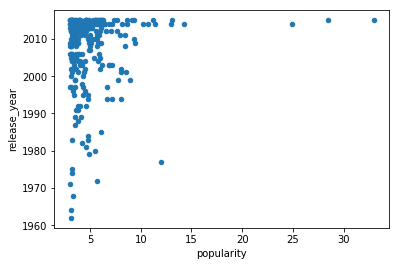

In [67]:
# Now that we have a sense of the variables, let's look at popularity, 
# and see if popular films are distributed relatively evenly over time
df.query('popularity > 3').plot('popularity', 'release_year', kind="scatter");
# Popular films skewed towards more modern ones
#ADD TITLE

,id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,...,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre_1,genre_2,genre_3,genre_4,genre_5
10438,657,2.508235,2500000,78898765.0,From Russia With Love,Sean Connery|Daniela Bianchi|Lotte Lenya|Rober...,Terence Young,Agent 007 is back in the second installment of...,115,Action|Thriller|Adventure,...,458,6.7,1963,1.780045e+07,5.617734e+08,Action,Thriller,Adventure,None,None
10439,9078,2.180410,0,0.0,The Sword in the Stone,Sebastian Cabot|Karl Swenson|Junius Matthews|N...,Wolfgang Reitherman,Wart is a young boy who aspires to be a knight...,79,Animation|Family,...,486,6.7,1963,0.000000e+00,0.000000e+00,Animation,Family,None,None,None
10472,679,2.485419,18500000,131060248.0,Aliens,Sigourney Weaver|Carrie Henn|Michael Biehn|Lan...,James Cameron,When Ripley's lifepod is found by a salvage cr...,137,Horror|Action|Thriller|Science Fiction,...,2027,7.6,1986,3.680402e+07,2.607321e+08,Horror,Action,Thriller,Science Fiction,None
10593,11886,2.272486,15000000,32056467.0,Robin Hood,Brian Bedford|Phil Harris|Peter Ustinov|Pat Bu...,Wolfgang Reitherman,"With King Richard off to the Crusades, Prince ...",83,Animation|Family,...,641,6.9,1973,7.366739e+07,1.574344e+08,Animation,Family,None,None,None
10594,9552,2.010733,8000000,441306145.0,The Exorcist,Linda Blair|Max von Sydow|Ellen Burstyn|Jason ...,William Friedkin,12-year-old Regan MacNeil begins to adapt an e...,122,Drama|Horror|Thriller,...,1113,7.2,1973,3.928928e+07,2.167325e+09,Drama,Horror,Thriller,None,None


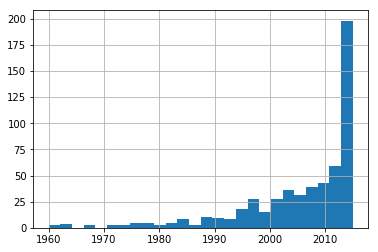

In [90]:
# Now let's look at all the popular films from 1964-2015 (defined as popularity > 2)
# First establish empty dataframe that can be appended on over query loop
popular_df = df.head(0)
#for year in range(1964,2016):
#    temp_df = df.query('release_year == {}'.format(year)).query('popularity > 2')
#    popular_df = popular_df.append(temp_df)
popular_df=df[df['popularity']>2]
popular_df['release_year'].hist(bins = 26)
popular_df.tail()
#Note that database/ popular movies skew to the left ()


In [91]:
#x = popular_df['release_year'].values
#pd.cut(x, [1963, 1975, 1986, 1996, 2006, 2016], labels=["1964-1975", "1975-1986", "1986-1996", "1996-2006", "2006-2015"])
bins = [1963, 1975, 1986, 1996, 2006, 2016]
names = ["1964-1975", "1976-1986", "1987-1996", "1997-2006", "2007-2015"]
popular_df['Period'] = pd.cut(df['release_year'], bins, labels=names)
popular_df.head()

,id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,...,vote_average,release_year,budget_adj,revenue_adj,genre_1,genre_2,genre_3,genre_4,genre_5,Period
0,135397,32.985763,150000000,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,...,6.5,2015,1.379999e+08,1.392446e+09,Action,Adventure,Science Fiction,Thriller,None,2007-2015
1,76341,28.419936,150000000,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,...,7.1,2015,1.379999e+08,3.481613e+08,Action,Adventure,Science Fiction,Thriller,None,2007-2015
2,262500,13.112507,110000000,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,...,6.3,2015,1.012000e+08,2.716190e+08,Adventure,Science Fiction,Thriller,None,None,2007-2015
3,140607,11.173104,200000000,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,...,7.5,2015,1.839999e+08,1.902723e+09,Action,Adventure,Science Fiction,Fantasy,None,2007-2015
4,168259,9.335014,190000000,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,...,7.3,2015,1.747999e+08,1.385749e+09,Action,Crime,Thriller,None,None,2007-2015


In [70]:
genre_df = popular_df.groupby(['Period','genre_1']).size()
#df = popular_df.groupby(by='Period', as_index=False).agg({'genre_1'})
genre_df

Period     genre_1        
1964-1975  Adventure           2
           Animation           1
           Comedy              1
           Drama               5
           Family              2
           Horror              1
           Science Fiction     2
1976-1986  Action              3
           Adventure           8
           Comedy              1
           Crime               1
           Drama               3
           Fantasy             2
           Horror              4
           Science Fiction     2
1987-1996  Action             10
           Adventure           9
           Animation           3
           Comedy              6
           Crime               3
           Drama               8
           Family              1
           Fantasy             5
           Horror              1
           Romance             3
           Science Fiction     3
           Thriller            1
1997-2006  Action             27
           Adventure          28
           Anima

In [71]:
genre1970s_df = popular_df.query('Period == "1964-1975"').groupby(['Period','genre_1']).size()
idx = []
for i in range(len(genre1970s_df)): 
    idx.append(genre1970s_df.index[i][1])
genre1970s_df.index = idx
genre1970s_df

Adventure          2
Animation          1
Comedy             1
Drama              5
Family             2
Horror             1
Science Fiction    2
dtype: int64

In [72]:
genre1980s_df = popular_df.query('Period == "1976-1986"').groupby(['Period','genre_1']).size()
idx = []
for i in range(len(genre1980s_df)): 
    idx.append(genre1980s_df.index[i][1])
genre1980s_df.index = idx
genre1980s_df

Action             3
Adventure          8
Comedy             1
Crime              1
Drama              3
Fantasy            2
Horror             4
Science Fiction    2
dtype: int64

In [73]:
genre1990s_df = popular_df.query('Period == "1987-1996"').groupby(['Period','genre_1']).size()
idx = []
for i in range(len(genre1990s_df)): 
    idx.append(genre1990s_df.index[i][1])
genre1990s_df.index = idx
genre1990s_df

Action             10
Adventure           9
Animation           3
Comedy              6
Crime               3
Drama               8
Family              1
Fantasy             5
Horror              1
Romance             3
Science Fiction     3
Thriller            1
dtype: int64

In [74]:
genre2000s_df = popular_df.query('Period == "1997-2006"').groupby(['Period','genre_1']).size()
idx = []
for i in range(len(genre2000s_df)): 
    idx.append(genre2000s_df.index[i][1])
genre2000s_df.index = idx
genre2000s_df

Action             27
Adventure          28
Animation          10
Comedy             16
Drama              18
Family              3
Fantasy             9
History             1
Horror              4
Music               1
Mystery             2
Romance             2
Science Fiction     4
Thriller            6
War                 1
dtype: int64

In [75]:
genre2010s_df = popular_df.query('Period == "2007-2015"').groupby(['Period','genre_1']).size()
idx = []
for i in range(len(genre2010s_df)): 
    idx.append(genre2010s_df.index[i][1])
genre2010s_df.index = idx
genre2010s_df
#    genre2010s_df.rename(lambda x: x[i][1])
# = genre2010s_df.index[i][1]


Action             87
Adventure          48
Animation          15
Comedy             42
Crime              14
Drama              48
Family              6
Fantasy            13
History             2
Horror              5
Mystery             4
Romance            10
Science Fiction    22
Thriller           19
War                 3
Western             1
dtype: int64

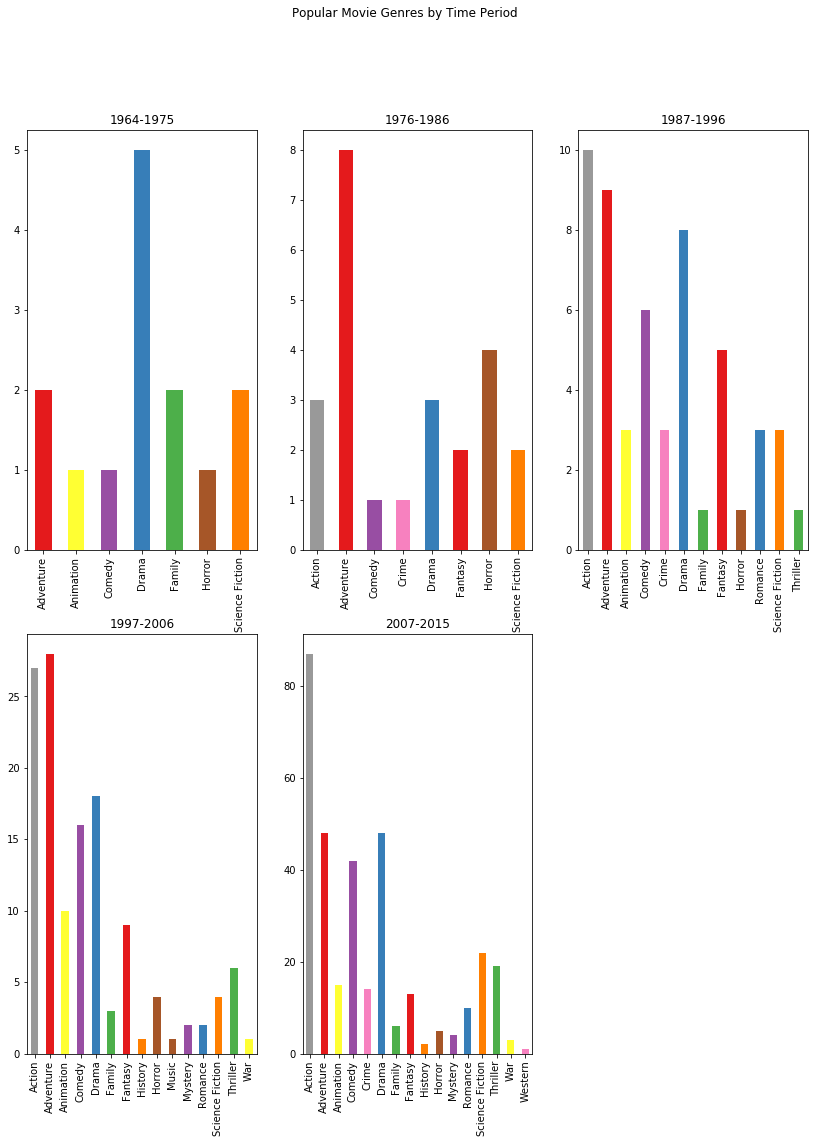

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
genre_list = popular_df['genre_1'].unique()
z = len(genre_list)
#colors = sns.color_palette("cubehelix", z)
colors = sns.color_palette("Set1", z)
color_map = dict(zip(genre_list, colors))

fig = plt.figure(figsize=(14,17))
fig.suptitle('Popular Movie Genres by Time Period')
plt.subplot(2, 3, 1)
genre1970s_df.plot(kind='bar', title="1964-1975", color=genre1970s_df.index.map(color_map));

plt.subplot(2, 3, 2)
genre1980s_df.plot(kind='bar', title="1976-1986", color=genre1980s_df.index.map(color_map));

plt.subplot(2, 3, 3)
genre1990s_df.plot(kind='bar', title="1987-1996", color=genre1990s_df.index.map(color_map));

plt.subplot(2, 3, 4)
genre2000s_df.plot(kind='bar', title="1997-2006", color=genre2000s_df.index.map(color_map));

plt.subplot(2, 3, 5)
genre2010s_df.plot(kind='bar', title="2007-2015", color=genre2010s_df.index.map(color_map));
plt.show()

In [77]:
# Dramas rule the popular genres in 1964-1975 period. 
# Adventure rules in 1976-1986. 
# Action & Adventure overtake drama after 1986, with Action becoming increasingly popular.
# Which movies are driving these trends? Let's look at the most popular movies by time period:
popular_df.head()
popular_df.query('Period == "1964-1975"').query('popularity > 3')

,id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,...,vote_average,release_year,budget_adj,revenue_adj,genre_1,genre_2,genre_3,genre_4,genre_5,Period
9881,658,3.153791,3500000,124900000.0,Goldfinger,Sean Connery|Honor Blackman|Gert FrÃ¶be|Shirle...,Guy Hamilton,Special agent 007 (Sean Connery) comes face to...,110,Adventure|Action|Thriller,...,7.0,1964,2.460594e+07,8.780804e+08,Adventure,Action,Thriller,None,None,1964-1975
9719,62,3.309196,12000000,56715371.0,2001: A Space Odyssey,Keir Dullea|Douglas Rain|Gary Lockwood|William...,Stanley Kubrick,Humanity finds a mysterious object buried bene...,149,Science Fiction|Mystery|Adventure,...,7.7,1968,7.522756e+07,3.555466e+08,Science Fiction,Mystery,Adventure,None,None,1964-1975
9923,185,3.072555,2200000,26589000.0,A Clockwork Orange,Malcolm McDowell|Patrick Magee|Adrienne Corri|...,Stanley Kubrick,"The head of a gang of toughs, in an insensitiv...",136,Science Fiction|Drama,...,7.7,1971,1.184743e+07,1.431869e+08,Science Fiction,Drama,None,None,None,1964-1975
7269,238,5.738034,6000000,245066411.0,The Godfather,Marlon Brando|Al Pacino|James Caan|Richard S. ...,Francis Ford Coppola,"Spanning the years 1945 to 1955, a chronicle o...",175,Drama|Crime,...,8.3,1972,3.128737e+07,1.277914e+09,Drama,Crime,None,None,None,1964-1975
9758,240,3.264571,13000000,47542841.0,The Godfather: Part II,Al Pacino|Robert Duvall|Diane Keaton|Robert De...,Francis Ford Coppola,In the continuing saga of the Corleone crime f...,200,Drama|Crime,...,8.1,1974,5.748969e+07,2.102479e+08,Drama,Crime,None,None,None,1964-1975
9805,510,3.258151,3000000,108981275.0,One Flew Over the Cuckoo's Nest,Jack Nicholson|Louise Fletcher|Danny DeVito|Wi...,MiloÅ¡ Forman,While serving time for insanity at a state men...,133,Drama,...,8.0,1975,1.215546e+07,4.415726e+08,Drama,None,None,None,None,1964-1975


In [78]:
popular_df.query('Period == "1976-1986"').query('popularity > 4')

,id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,...,vote_average,release_year,budget_adj,revenue_adj,genre_1,genre_2,genre_3,genre_4,genre_5,Period
1329,11,12.037933,11000000,775398007.0,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,Princess Leia is captured and held hostage by ...,121,Adventure|Action|Science Fiction,...,7.9,1977,3.957559e+07,2.789712e+09,Adventure,Action,Science Fiction,None,None,1976-1986
7825,348,4.935897,11000000,104931801.0,Alien,Sigourney Weaver|Tom Skerritt|Veronica Cartwri...,Ridley Scott,"During its return to the earth, commercial spa...",117,Horror|Action|Thriller|Science Fiction,...,7.6,1979,3.305009e+07,3.152733e+08,Horror,Action,Thriller,Science Fiction,None,1976-1986
7309,1891,5.488441,18000000,538400000.0,The Empire Strikes Back,Mark Hamill|Harrison Ford|Carrie Fisher|Billy ...,Irvin Kershner,"The epic saga continues as Luke Skywalker, in ...",124,Adventure|Action|Science Fiction,...,8.0,1980,4.762866e+07,1.424626e+09,Adventure,Action,Science Fiction,None,None,1976-1986
8375,85,4.578300,18000000,389925971.0,Raiders of the Lost Ark,Harrison Ford|Karen Allen|Paul Freeman|Ronald ...,Steven Spielberg,When Dr. Indiana Jones â€“ the tweed-suited pr...,115,Adventure|Action,...,7.5,1981,4.316743e+07,9.351169e+08,Adventure,Action,None,None,None,1976-1986
8888,78,4.215642,28000000,32768670.0,Blade Runner,Harrison Ford|Rutger Hauer|Sean Young|Edward J...,Ridley Scott,In the smog-choked dystopian Los Angeles of 20...,117,Science Fiction|Drama|Thriller,...,7.7,1982,6.326999e+07,7.404548e+07,Science Fiction,Drama,Thriller,None,None,1976-1986
7987,1892,4.828854,32350000,572700000.0,Return of the Jedi,Mark Hamill|Harrison Ford|Carrie Fisher|Billy ...,Richard Marquand,As Rebel leaders map their strategy for an all...,135,Adventure|Action|Science Fiction,...,7.8,1983,7.082424e+07,1.253819e+09,Adventure,Action,Science Fiction,None,None,1976-1986
7882,218,4.831966,6400000,78371200.0,The Terminator,Arnold Schwarzenegger|Michael Biehn|Linda Hami...,James Cameron,"In the post-apocalyptic future, reigning tyran...",108,Action|Thriller|Science Fiction,...,7.1,1984,1.343387e+07,1.645044e+08,Action,Thriller,Science Fiction,None,None,1976-1986
6081,105,6.095293,19000000,381109762.0,Back to the Future,Michael J. Fox|Christopher Lloyd|Lea Thompson|...,Robert Zemeckis,Eighties teenager Marty McFly is accidentally ...,116,Adventure|Comedy|Science Fiction|Family,...,7.8,1985,3.851615e+07,7.725728e+08,Adventure,Comedy,Science Fiction,Family,None,1976-1986


In [79]:
popular_df.query('Period == "1987-1996"').query('popularity > 4')

,id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,...,vote_average,release_year,budget_adj,revenue_adj,genre_1,genre_2,genre_3,genre_4,genre_5,Period
9179,10144,4.143585,40000000,211343479.0,The Little Mermaid,Jodi Benson|Christopher Daniel Barnes|Jason Ma...,Ron Clements|John Musker,This colorful adventure tells the story of an ...,83,Animation|Family,...,7.1,1989,7.035940e+07,3.717500e+08,Animation,Family,None,None,None,1987-1996
8242,500,4.586426,1200000,14661007.0,Reservoir Dogs,Harvey Keitel|Tim Roth|Michael Madsen|Chris Pe...,Quentin Tarantino,A botched robbery indicates a police informant...,99,Crime|Thriller,...,7.9,1992,1.864829e+06,2.278356e+07,Crime,Thriller,None,None,None,1987-1996
4177,680,8.093754,8000000,213928762.0,Pulp Fiction,John Travolta|Samuel L. Jackson|Uma Thurman|Br...,Quentin Tarantino,"A burger-loving hit man, his philosophical par...",154,Thriller|Crime,...,8.1,1994,1.176889e+07,3.147131e+08,Thriller,Crime,None,None,None,1987-1996
4178,278,7.192039,25000000,28341469.0,The Shawshank Redemption,Tim Robbins|Morgan Freeman|Bob Gunton|William ...,Frank Darabont,Framed in the 1940s for the double murder of h...,142,Drama|Crime,...,8.4,1994,3.677779e+07,4.169346e+07,Drama,Crime,None,None,None,1987-1996
4179,13,6.715966,55000000,677945399.0,Forrest Gump,Tom Hanks|Robin Wright|Gary Sinise|Mykelti Wil...,Robert Zemeckis,A man with a low IQ has accomplished great thi...,142,Comedy|Drama|Romance,...,8.1,1994,8.091114e+07,9.973333e+08,Comedy,Drama,Romance,None,None,1987-1996
4180,8587,4.782688,45000000,788241776.0,The Lion King,Jonathan Taylor Thomas|Matthew Broderick|James...,Roger Allers|Rob Minkoff,A young lion cub named Simba can't wait to be ...,89,Family|Animation|Drama,...,7.7,1994,6.620002e+07,1.159592e+09,Family,Animation,Drama,None,None,1987-1996
8067,807,4.765359,33000000,327311859.0,Se7en,Brad Pitt|Morgan Freeman|Gwyneth Paltrow|John ...,David Fincher,Two homicide detectives are on a desperate hun...,127,Crime|Mystery|Thriller,...,7.9,1995,4.722191e+07,4.683724e+08,Crime,Mystery,Thriller,None,None,1987-1996
8068,862,4.282462,30000000,361958736.0,Toy Story,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,Woody the cowboy is young Andyâ€™s favorite to...,81,Animation|Comedy|Family,...,7.5,1995,4.292901e+07,5.179510e+08,Animation,Comedy,Family,None,None,1987-1996
8457,602,4.480733,75000000,816969268.0,Independence Day,Will Smith|Bill Pullman|Jeff Goldblum|Mary McD...,Roland Emmerich,"On July 2, a giant alien mothership enters orb...",145,Action|Adventure|Science Fiction,...,6.6,1996,1.042663e+08,1.135764e+09,Action,Adventure,Science Fiction,None,None,1987-1996


In [80]:
popular_df.query('Period == "1997-2006"').query('popularity > 6')

,id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,...,vote_average,release_year,budget_adj,revenue_adj,genre_1,genre_2,genre_3,genre_4,genre_5,Period
5230,13590,6.668990,0,0.000000e+00,Eddie Izzard: Glorious,Eddie Izzard|Mac McDonald|Rhona Mitra,Peter Richardson,Eddie Izzard's routine has a loose trajectory ...,99,Comedy,...,5.5,1997,0.000000e+00,0.000000e+00,Comedy,None,None,None,None,1997-2006
2409,550,8.947905,63000000,1.008538e+08,Fight Club,Edward Norton|Brad Pitt|Meat Loaf|Jared Leto|H...,David Fincher,A ticking-time-bomb insomniac and a slippery s...,139,Drama,...,8.1,1999,8.247033e+07,1.320229e+08,Drama,None,None,None,None,1997-2006
2410,603,7.753899,63000000,4.635174e+08,The Matrix,Keanu Reeves|Laurence Fishburne|Carrie-Anne Mo...,Lilly Wachowski|Lana Wachowski,"Set in the 22nd century, The Matrix tells the ...",136,Action|Science Fiction,...,7.8,1999,8.247033e+07,6.067687e+08,Action,Science Fiction,None,None,None,1997-2006
2633,120,8.575419,93000000,8.713684e+08,The Lord of the Rings: The Fellowship of the Ring,Elijah Wood|Ian McKellen|Viggo Mortensen|Liv T...,Peter Jackson,"Young hobbit Frodo Baggins, after inheriting a...",178,Adventure|Fantasy|Action,...,7.8,2001,1.145284e+08,1.073080e+09,Adventure,Fantasy,Action,None,None,1997-2006
2634,671,8.021423,125000000,9.764756e+08,Harry Potter and the Philosopher's Stone,Daniel Radcliffe|Rupert Grint|Emma Watson|John...,Chris Columbus,Harry Potter has lived under the stairs at his...,152,Adventure|Fantasy|Family,...,7.2,2001,1.539360e+08,1.202518e+09,Adventure,Fantasy,Family,None,None,1997-2006
3911,121,8.095275,79000000,9.262874e+08,The Lord of the Rings: The Two Towers,Elijah Wood|Ian McKellen|Viggo Mortensen|Liv T...,Peter Jackson,Frodo and Sam are trekking to Mordor to destro...,179,Adventure|Fantasy|Action,...,7.8,2002,9.576865e+07,1.122902e+09,Adventure,Fantasy,Action,None,None,1997-2006
3912,672,6.012584,100000000,8.766885e+08,Harry Potter and the Chamber of Secrets,Daniel Radcliffe|Rupert Grint|Emma Watson|Kenn...,Chris Columbus,"Ignoring threats to his life, Harry returns to...",161,Adventure|Fantasy|Family,...,7.2,2002,1.212261e+08,1.062776e+09,Adventure,Fantasy,Family,None,None,1997-2006
4949,122,7.122455,94000000,1.118889e+09,The Lord of the Rings: The Return of the King,Elijah Wood|Ian McKellen|Viggo Mortensen|Liv T...,Peter Jackson,Aragorn is revealed as the heir to the ancient...,201,Adventure|Fantasy|Action,...,7.9,2003,1.114231e+08,1.326278e+09,Adventure,Fantasy,Action,None,None,1997-2006
4950,277,6.887883,22000000,9.570846e+07,Underworld,Kate Beckinsale|Scott Speedman|Michael Sheen|S...,Len Wiseman,Vampires and werewolves have waged a nocturnal...,121,Fantasy|Action|Thriller,...,6.5,2003,2.607776e+07,1.134483e+08,Fantasy,Action,Thriller,None,None,1997-2006
4951,22,6.864067,140000000,6.550112e+08,Pirates of the Caribbean: The Curse of the Bla...,Johnny Depp|Geoffrey Rush|Orlando Bloom|Keira ...,Gore Verbinski,"Jack Sparrow, a freewheeling 17th-century pira...",143,Adventure|Fantasy|Action,...,7.3,2003,1.659494e+08,7.764193e+08,Adventure,Fantasy,Action,None,None,1997-2006


In [81]:
popular_df.query('Period == "2007-2015"').query('popularity > 8')

,id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,...,vote_average,release_year,budget_adj,revenue_adj,genre_1,genre_2,genre_3,genre_4,genre_5,Period
2875,155,8.466668,185000000,1.001922e+09,The Dark Knight,Christian Bale|Michael Caine|Heath Ledger|Aaro...,Christopher Nolan,Batman raises the stakes in his war on crime. ...,152,Drama|Action|Crime|Thriller,...,8.1,2008,1.873655e+08,1.014733e+09,Drama,Action,Crime,Thriller,None,2007-2015
1386,19995,9.432768,237000000,2.781506e+09,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,"In the 22nd century, a paraplegic Marine is di...",162,Action|Adventure|Fantasy|Science Fiction,...,7.1,2009,2.408869e+08,2.827124e+09,Action,Adventure,Fantasy,Science Fiction,None,2007-2015
1919,27205,9.363643,160000000,8.255000e+08,Inception,Leonardo DiCaprio|Joseph Gordon-Levitt|Ellen P...,Christopher Nolan,"Cobb, a skilled thief who commits corporate es...",148,Action|Thriller|Science Fiction|Mystery|Adventure,...,7.9,2010,1.600000e+08,8.255000e+08,Action,Thriller,Science Fiction,Mystery,Adventure,2007-2015
3371,161337,8.411577,0,0.000000e+00,Underworld: Endless War,Trevor Devall|Brian Dobson|Paul Dobson|Laura H...,Juno John Lee,Underworld: Endless War is a collection of thr...,18,Action|Animation|Horror,...,5.9,2011,0.000000e+00,0.000000e+00,Action,Animation,Horror,None,None,2007-2015
629,157336,24.949134,165000000,6.217525e+08,Interstellar,Matthew McConaughey|Jessica Chastain|Anne Hath...,Christopher Nolan,Interstellar chronicles the adventures of a gr...,169,Adventure|Drama|Science Fiction,...,8.0,2014,1.519800e+08,5.726906e+08,Adventure,Drama,Science Fiction,None,None,2007-2015
630,118340,14.311205,170000000,7.733124e+08,Guardians of the Galaxy,Chris Pratt|Zoe Saldana|Dave Bautista|Vin Dies...,James Gunn,"Light years from Earth, 26 years after being a...",121,Action|Science Fiction|Adventure,...,7.9,2014,1.565855e+08,7.122911e+08,Action,Science Fiction,Adventure,None,None,2007-2015
631,100402,12.971027,170000000,7.147666e+08,Captain America: The Winter Soldier,Chris Evans|Scarlett Johansson|Sebastian Stan|...,Joe Russo|Anthony Russo,After the cataclysmic events in New York with ...,136,Action|Adventure|Science Fiction,...,7.6,2014,1.565855e+08,6.583651e+08,Action,Adventure,Science Fiction,None,None,2007-2015
632,245891,11.422751,20000000,7.873990e+07,John Wick,Keanu Reeves|Michael Nyqvist|Alfie Allen|Wille...,Chad Stahelski|David Leitch,"After the sudden death of his beloved wife, Jo...",101,Action|Thriller,...,7.0,2014,1.842182e+07,7.252661e+07,Action,Thriller,None,None,None,2007-2015
633,131631,10.739009,125000000,7.521002e+08,The Hunger Games: Mockingjay - Part 1,Jennifer Lawrence|Josh Hutcherson|Liam Hemswor...,Francis Lawrence,Katniss Everdeen reluctantly becomes the symbo...,123,Science Fiction|Adventure|Thriller,...,6.6,2014,1.151364e+08,6.927528e+08,Science Fiction,Adventure,Thriller,None,None,2007-2015
634,122917,10.174599,250000000,9.551198e+08,The Hobbit: The Battle of the Five Armies,Martin Freeman|Ian McKellen|Richard Armitage|K...,Peter Jackson,Immediately after the events of The Desolation...,144,Adventure|Fantasy,...,7.1,2014,2.302728e+08,8.797523e+08,Adventure,Fantasy,None,None,None,2007-2015


### Research Question 2: Do movies tend to "follow the leader" when it comes to genre, and do multiple movies in the same genre follow big (high revenue) hits?

In [82]:
# Let's start by looking at the 10 biggest hits by adjusted revenue
df_top10 = df.sort_values(by=['revenue_adj'], ascending=False).head(10)
df_top10

,id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,...,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre_1,genre_2,genre_3,genre_4,genre_5
1386,19995,9.432768,237000000,2.781506e+09,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,"In the 22nd century, a paraplegic Marine is di...",162,Action|Adventure|Fantasy|Science Fiction,...,8458,7.1,2009,2.408869e+08,2.827124e+09,Action,Adventure,Fantasy,Science Fiction,None
1329,11,12.037933,11000000,7.753980e+08,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,Princess Leia is captured and held hostage by ...,121,Adventure|Action|Science Fiction,...,4428,7.9,1977,3.957559e+07,2.789712e+09,Adventure,Action,Science Fiction,None,None
5231,597,4.355219,200000000,1.845034e+09,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,"84 years later, a 101-year-old woman named Ros...",194,Drama|Romance|Thriller,...,4654,7.3,1997,2.716921e+08,2.506406e+09,Drama,Romance,Thriller,None,None
10594,9552,2.010733,8000000,4.413061e+08,The Exorcist,Linda Blair|Max von Sydow|Ellen Burstyn|Jason ...,William Friedkin,12-year-old Regan MacNeil begins to adapt an e...,122,Drama|Horror|Thriller,...,1113,7.2,1973,3.928928e+07,2.167325e+09,Drama,Horror,Thriller,None,None
9806,578,2.563191,7000000,4.706540e+08,Jaws,Roy Scheider|Robert Shaw|Richard Dreyfuss|Lorr...,Steven Spielberg,An insatiable great white shark terrorizes the...,124,Horror|Thriller|Adventure,...,1415,7.3,1975,2.836275e+07,1.907006e+09,Horror,Thriller,Adventure,None,None
3,140607,11.173104,200000000,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,...,5292,7.5,2015,1.839999e+08,1.902723e+09,Action,Adventure,Science Fiction,Fantasy,None
8889,601,2.900556,10500000,7.929106e+08,E.T. the Extra-Terrestrial,Henry Thomas|Drew Barrymore|Robert MacNaughton...,Steven Spielberg,A science fiction fairytale about an extra-ter...,115,Science Fiction|Adventure|Family|Fantasy,...,1830,7.2,1982,2.372625e+07,1.791694e+09,Science Fiction,Adventure,Family,Fantasy,None
10110,12230,2.631987,4000000,2.158800e+08,One Hundred and One Dalmatians,Rod Taylor|J. Pat O'Malley|Betty Lou Gerson|Ma...,Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman,When a litter of dalmatian puppies are abducte...,79,Adventure|Animation|Comedy|Family,...,913,6.6,1961,2.917944e+07,1.574815e+09,Adventure,Animation,Comedy,Family,None
4361,24428,7.637767,220000000,1.519558e+09,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Joss Whedon,When an unexpected enemy emerges and threatens...,143,Science Fiction|Action|Adventure,...,8903,7.3,2012,2.089437e+08,1.443191e+09,Science Fiction,Action,Adventure,None,None
7309,1891,5.488441,18000000,5.384000e+08,The Empire Strikes Back,Mark Hamill|Harrison Ford|Carrie Fisher|Billy ...,Irvin Kershner,"The epic saga continues as Luke Skywalker, in ...",124,Adventure|Action|Science Fiction,...,3954,8.0,1980,4.762866e+07,1.424626e+09,Adventure,Action,Science Fiction,None,None


In [83]:
#I've actually seen all 10 of these movies! Does the primary genre ("genre_1") reflect the style well?
#For "Avatar", I would go as far as "genre_3", 'Fantasy', to talk about its unique style.
#For some others, like "Star Wars", "genre_3" again contains important signals about the movie's unique style ("Science Fiction" in this case)
#Let's look at the prevalance of these different genres 0, 1, and 2 years before the movie; as well as
#1, 2, and 3 years after. It takes a while to produce a movie, so if hit movies impact the genres of 
#movies produced afterwards, we'd likely see this affect primarily 2-3 years later...
#Starting with Avatar... Let's look at the prevalence of Action, Adventure and Fantasy movies
#First start by dropping the 'genre_4' and 'genre_5' columns to prepare for genre type analyses without picking up tails:
df_ques2 = df.drop(columns=['genres', 'genre_4', 'genre_5'])
df_ques2

,id,popularity,budget,revenue,original_title,cast,director,overview,runtime,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre_1,genre_2,genre_3
0,135397,32.985763,150000000,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Adventure,Science Fiction
1,76341,28.419936,150000000,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Action,Adventure,Science Fiction
2,262500,13.112507,110000000,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure,Science Fiction,Thriller
3,140607,11.173104,200000000,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,Action,Adventure,Science Fiction
4,168259,9.335014,190000000,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,Action,Crime,Thriller
5,281957,9.110700,135000000,5.329505e+08,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08,Western,Drama,Adventure
6,87101,8.654359,155000000,4.406035e+08,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,"The year is 2029. John Connor, leader of the r...",125,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08,Science Fiction,Action,Thriller
7,286217,7.667400,108000000,5.953803e+08,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,"During a manned mission to Mars, Astronaut Mar...",141,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08,Drama,Adventure,Science Fiction
8,211672,7.404165,74000000,1.156731e+09,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,"Minions Stuart, Kevin and Bob are recruited by...",91,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09,Family,Animation,Adventure
9,150540,6.326804,175000000,8.537086e+08,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,"Growing up can be a bumpy road, and it's no ex...",94,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15,3935,8.0,2015,1.609999e+08,7.854116e+08,Comedy,Animation,Family


In [84]:
#df_ques2.isin('Action').any(1)
#df[(df.foo == 222) | (df.bar == 444)]
len(df_ques2.query('genre_1 == "Action" | genre_2 == "Action" | genre_3 == "Action"').query('release_year == 2007'))
#BEFORE: 2007, 2008, 2009
#df.query('release_year == "2007"')['genre_1'].value_counts()
#len(df.query('release_year == "2007"')['genre_1'])

92

In [85]:
year = df_top10.iloc[0,14]
g1 = df_top10.iloc[0,17]
g2 = df_top10.iloc[0,18]
g3 = df_top10.iloc[0,19]
pre2 = year-2
len(df_ques2.query('genre_1 == @g1 | genre_2 == @g1 | genre_3 == @g1').query('release_year == @pre2'))

92

In [86]:
# REMOVE?
#Genre_Set = set(df_top10.iloc[:,17].values)
#list(set.union(*map(set, a)))

NameError: name 'a' is not defined

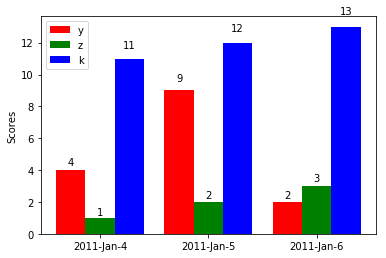

In [87]:
N = 3
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

yvals = [4, 9, 2]
rects1 = ax.bar(ind, yvals, width, color='r')
zvals = [1,2,3]
rects2 = ax.bar(ind+width, zvals, width, color='g')
kvals = [11,12,13]
rects3 = ax.bar(ind+width*2, kvals, width, color='b')

ax.set_ylabel('Scores')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('2011-Jan-4', '2011-Jan-5', '2011-Jan-6') )
ax.legend( (rects1[0], rects2[0], rects3[0]), ('y', 'z', 'k') )

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.show()

<a id='conclusions'></a>
## Conclusions

> In terms of trends with genres, Dramas rule the popular genres in 1964-1975 period. 
Adventure rules in 1976-1986. 
Action & Adventure overtake drama after 1986, with Action becoming increasingly popular.

> Still need to complete question 2...

In [43]:
import numpy as np
import random
import pandas as pd
#def df_to_numpy(df, y_column):

x = [1,3,5]
y = [2,4,6]
df = pd.DataFrame([x,y])
df.columns = ['a','b','c']
print(df)

   a  b  c
0  1  3  5
1  2  4  6
